Rapport de classification :

                   precision    recall  f1-score   support

 pollution faible       1.00      0.96      0.98        24
pollution moyenne       0.96      1.00      0.98        51
 pollution élevée       1.00      1.00      1.00         1
 station aérienne       1.00      0.86      0.92         7

         accuracy                           0.98        83
        macro avg       0.99      0.95      0.97        83
     weighted avg       0.98      0.98      0.98        83



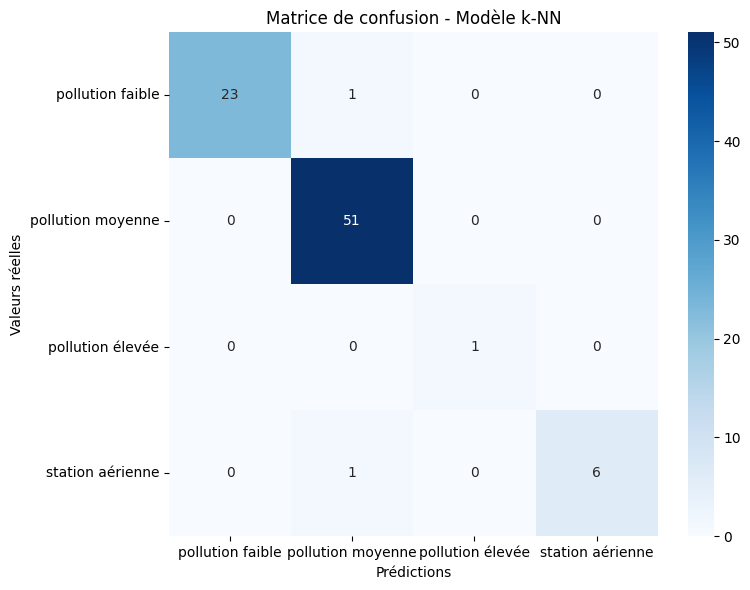

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv("train.csv")

# Suppression des colonnes inutiles
df = df.drop(columns=[
    'Identifiant station', 'Nom de la Station', 'Niveau de pollution aux particules',
    'Incertitude', 'Action(s) QAI en cours', 'air'
])

# Suppression des lignes inutilisables
df = df[df['niveau_pollution'] != 'pas de données']

# Encodage des colonnes catégorielles
le_ligne = LabelEncoder()
le_reco = LabelEncoder()
le_nivpol = LabelEncoder()
le_cible = LabelEncoder()

df['Nom de la ligne'] = le_ligne.fit_transform(df['Nom de la ligne'])
df['Recommandation de surveillance'] = le_reco.fit_transform(df['Recommandation de surveillance'])
df['Niveau de pollution'] = le_nivpol.fit_transform(df['Niveau de pollution'])
df['niveau_pollution'] = le_cible.fit_transform(df['niveau_pollution'])

# Séparation X / y
X = df.drop(columns=['niveau_pollution'])
y = df['niveau_pollution']

# Découpage des données en train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline avec standardisation et k-NN
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Affichage du rapport de classification
print("Rapport de classification :\n")
print(classification_report(y_test, y_pred, target_names=le_cible.classes_))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_cible.classes_,
            yticklabels=le_cible.classes_)
plt.title("Matrice de confusion - Modèle k-NN")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.tight_layout()
plt.show()

